## Aviation Data
My project aims to predict the risk involved in  flight
### Data Source and Data Exploration
This data comes from a kaggel competition which provides details in Aviation.
Source : https://www.kaggle.com/khsamaha/aviation-accident-database-synopses

The target variable shows that there are some outliers in the data, which are injuries that occurred by the type of the airplane used in the dataset

I used 21 columns for my analysis, which included variables about:
  * Injuries
  * Make and Model
  * Purpose of flight and many more
  

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numbers import Number
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("AviationData.csv",encoding="latin-1")
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Personal,NaN,NaN,1.0,NaN,NaN,VMC,DESCENT,Preliminary,14-05-2020
1,20200508X55730,Accident,CEN20CA176,5/8/2020,"San Antonio, TX",United States,29.723334,-98.694444,5C1,NaN,...,Personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,14-05-2020
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,NaN,Preliminary,14-05-2020
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,15-05-2020
4,20200504X54503,Incident,ENG20IA031,5/3/2020,"Clewiston, FL",United States,26.735000,-81.051111,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,12/5/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,16-04-1980
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12/9/2000
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,26-02-2007
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19-09-1996


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84983 entries, 0 to 84982
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84983 non-null  object 
 1   Investigation.Type      84978 non-null  object 
 2   Accident.Number         84983 non-null  object 
 3   Event.Date              84983 non-null  object 
 4   Location                84905 non-null  object 
 5   Country                 84476 non-null  object 
 6   Latitude                30658 non-null  float64
 7   Longitude               30649 non-null  float64
 8   Airport.Code            48005 non-null  object 
 9   Airport.Name            50746 non-null  object 
 10  Injury.Severity         84983 non-null  object 
 11  Aircraft.Damage         82096 non-null  object 
 12  Aircraft.Category       28257 non-null  object 
 13  Registration.Number     80837 non-null  object 
 14  Make                    84913 non-null

In [6]:
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,30658.000000,30649.000000,79684.000000,57165.000000,54473.000000,55702.000000,70099.000000
mean,37.429864,-93.251873,1.148060,0.854456,0.333633,0.526839,6.189361
std,12.575431,39.908402,0.447671,6.331490,1.377897,2.902865,30.350484
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.269167,-114.795277,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.085416,-94.298611,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.500903,-81.605833,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,435.833334,8.000000,349.000000,111.000000,380.000000,699.000000


In [ ]:
#check total nulls in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            5
Accident.Number               0
Event.Date                    0
Location                     78
Country                     507
Latitude                  54325
Longitude                 54334
Airport.Code              36978
Airport.Name              34237
Injury.Severity               0
Aircraft.Damage            2887
Aircraft.Category         56726
Registration.Number        4146
Make                         70
Model                        99
Amateur.Built               680
Number.of.Engines          5299
Engine.Type                4478
FAR.Description           57047
Schedule                  72892
Purpose.of.Flight          5282
Air.Carrier               80737
Total.Fatal.Injuries      27818
Total.Serious.Injuries    30510
Total.Minor.Injuries      29281
Total.Uninjured           14884
Weather.Condition          3398
Broad.Phase.of.Flight      6601
Report.Status                 0
Publication.Date          14657
dtype: i

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Personal,NaN,NaN,1.0,NaN,NaN,VMC,DESCENT,Preliminary,14-05-2020
1,20200508X55730,Accident,CEN20CA176,5/8/2020,"San Antonio, TX",United States,29.723334,-98.694444,5C1,NaN,...,Personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,14-05-2020
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,NaN,Preliminary,14-05-2020
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,15-05-2020
4,20200504X54503,Incident,ENG20IA031,5/3/2020,"Clewiston, FL",United States,26.735000,-81.051111,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,12/5/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,NaN,VMC,APPROACH,Probable Cause,16-04-1980
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,CRUISE,Probable Cause,12/9/2000
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,CRUISE,Probable Cause,26-02-2007
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,UNKNOWN,Probable Cause,19-09-1996


In [ ]:
#check for columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [10]:
columns_not_wanted = ['Registration.Number','Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule','Air.Carrier','Broad.Phase.of.Flight','Publication.Date']
df[columns_not_wanted]

,Registration.Number,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Air.Carrier,Broad.Phase.of.Flight,Publication.Date
0,N318WH,Yes,NaN,NaN,Part 91: General Aviation,NaN,NaN,DESCENT,14-05-2020
1,N3238G,No,NaN,NaN,Part 91: General Aviation,NaN,NaN,NaN,14-05-2020
2,N25HE,No,1.0,NaN,Part 91: General Aviation,NaN,NaN,NaN,14-05-2020
3,N11457,No,1.0,NaN,Part 91: General Aviation,NaN,NaN,NaN,15-05-2020
4,N1WT,No,1.0,Turbo Shaft,Part 91: General Aviation,NaN,NaN,NaN,12/5/2020
...,...,...,...,...,...,...,...,...,...
84978,N15NY,No,NaN,NaN,NaN,NaN,NaN,APPROACH,16-04-1980
84979,N1168J,No,1.0,Reciprocating,NaN,NaN,NaN,CRUISE,12/9/2000
84980,N5142R,No,1.0,Reciprocating,NaN,NaN,NaN,CRUISE,26-02-2007
84981,N5069P,No,1.0,Reciprocating,NaN,NaN,NaN,UNKNOWN,19-09-1996


In [ ]:
#drop columns that are not needed for investigations
df=df.drop(columns=columns_not_wanted)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Aircraft.Category,Make,Model,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Airplane,Titan,TITAN TORNADO S,Personal,NaN,1.0,NaN,NaN,VMC,Preliminary
1,20200508X55730,Accident,CEN20CA176,5/8/2020,"San Antonio, TX",United States,29.723334,-98.694444,5C1,NaN,...,Airplane,North American,SNJ,Personal,NaN,NaN,NaN,NaN,NaN,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Airplane,CESSNA,T240,Personal,NaN,NaN,NaN,2.0,VMC,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Airplane,Waco,QCF,Personal,NaN,NaN,NaN,1.0,VMC,Preliminary
4,20200504X54503,Incident,ENG20IA031,5/3/2020,"Clewiston, FL",United States,26.735000,-81.051111,NaN,NaN,...,Helicopter,AIRBUS HELICOPTERS,AS350,Personal,NaN,NaN,NaN,1.0,NaN,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,Cessna,501,Personal,1.0,2.0,NaN,NaN,VMC,Probable Cause
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [12]:
df.columns.value_counts().sum()

22

In [20]:
df.columns=df.columns.str.replace('.','')

In [ ]:
"""
dealing with missing values for floats decided to add zero
The data integrity is import thus report giving it the median,mode or mean can 
lead to distortion of information
"""
df['Total.Fatal.Injuries'].fillna(0,inplace=True)
df['Total.Serious.Injuries'].fillna(0,inplace=True)
df['Total.Minor.Injuries'].fillna(0,inplace=True)
df['Total.Uninjured'].fillna(0,inplace=True)

In [ ]:
"""
for strings or object decided to give it missing values when it comes to cleaning the rows
for floats decided to give zero for longitude and latitude since we have to follow data integrity for
given location
"""
df['Country'].fillna('missing',inplace=True)
df["AirportCode"].fillna("missing",inplace=True)
df["Make"].fillna('missing',inplace=True)
df["Model"].fillna('missing',inplace=True)
df["AirportName"].fillna('missing',inplace=True)
df["WeatherCondition"].fillna('missing',inplace=True)
df["AircraftCategory"].fillna('missing',inplace=True)
df["AircraftDamage"].fillna('missing',inplace=True)
df["PurposeofFlight"].fillna('missing',inplace=True)
df["Latitude"].fillna(0,inplace=True)
df["Longitude"].fillna(0,inplace=True)



In [142]:
#check if the columns are well aligned
df

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,AircraftDamage,...,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus,Year
0,20200509X11853,Accident,CEN20LA173,05-09-2020,"Haskell, OK",United States,35.864167,-95.655556,Non-Fatal,Substantial,...,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary,2020
1,20200507X60215,Accident,CEN20CA174,05-06-2020,"Gonazales, TX",United States,29.529167,-97.464167,Non-Fatal,Substantial,...,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary,2020
2,20200509X85739,Accident,ERA20CA175,05-03-2020,"Shirley, NY",United States,40.828056,-72.865556,Non-Fatal,Substantial,...,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary,2020
3,20200502X81549,Accident,CEN20LA168,05-02-2020,"PALMYRA, IL",United States,39.408889,-89.990277,Fatal(1),Destroyed,...,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary,2020
4,20200502X73540,Accident,CEN20LA167,05-02-2020,"HOUSTON, TX",United States,29.947222,-95.395833,Fatal(1),Substantial,...,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77236,20041105X01764,Accident,CHI79FA064,08-02-1979,"Canton, OH",United States,0.000000,0.000000,Fatal(1),Destroyed,...,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause,1979
77237,20001218X45448,Accident,LAX96LA321,19-06-1977,"EUREKA, CA",United States,0.000000,0.000000,Fatal(2),Destroyed,...,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,1977
77238,20061025X01555,Accident,NYC07LA005,30-08-1974,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,...,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause,1974
77239,20001218X45447,Accident,LAX94LA336,19-07-1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,Fatal(4),Destroyed,...,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,1962


### Remove rows with missing values

In [ ]:
#removed missing rows from weather condition
for x in df.index:
 if df.loc[x,"WeatherCondition"] == 'missing':
     df.drop(x,inplace=True)
df 

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Airplane,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Airplane,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Airplane,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary
6,20200502X81549,Accident,CEN20LA168,5/2/2020,"PALMYRA, IL",United States,39.408889,-89.990277,5K1,Zelmer Memorial Airpark Inc,...,Airplane,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary
7,20200502X73540,Accident,CEN20LA167,5/2/2020,"HOUSTON, TX",United States,29.947222,-95.395833,missing,missing,...,Helicopter,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,0.000000,0.000000,missing,missing,...,missing,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,0.000000,0.000000,missing,missing,...,missing,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,missing,missing,...,missing,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,missing,missing,...,missing,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [ ]:
#removed missing rows from make
for x in df.index:
 if df.loc[x,"Make"] == 'missing':
     df.drop(x,inplace=True)
df 

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Airplane,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Airplane,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Airplane,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary
6,20200502X81549,Accident,CEN20LA168,5/2/2020,"PALMYRA, IL",United States,39.408889,-89.990277,5K1,Zelmer Memorial Airpark Inc,...,Airplane,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary
7,20200502X73540,Accident,CEN20LA167,5/2/2020,"HOUSTON, TX",United States,29.947222,-95.395833,missing,missing,...,Helicopter,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,0.000000,0.000000,missing,missing,...,missing,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,0.000000,0.000000,missing,missing,...,missing,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,missing,missing,...,missing,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,missing,missing,...,missing,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [ ]:
#removed missing rows from model
for x in df.index:
 if df.loc[x,"Model"] == 'missing':
     df.drop(x,inplace=True)
df 

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Airplane,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Airplane,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Airplane,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary
6,20200502X81549,Accident,CEN20LA168,5/2/2020,"PALMYRA, IL",United States,39.408889,-89.990277,5K1,Zelmer Memorial Airpark Inc,...,Airplane,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary
7,20200502X73540,Accident,CEN20LA167,5/2/2020,"HOUSTON, TX",United States,29.947222,-95.395833,missing,missing,...,Helicopter,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,0.000000,0.000000,missing,missing,...,missing,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,0.000000,0.000000,missing,missing,...,missing,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,missing,missing,...,missing,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,missing,missing,...,missing,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [ ]:
#removed missing rows from aircraft damage
for x in df.index:
 if df.loc[x,"AircraftDamage"] == 'missing':
     df.drop(x,inplace=True)
df 

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Airplane,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Airplane,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Airplane,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary
6,20200502X81549,Accident,CEN20LA168,5/2/2020,"PALMYRA, IL",United States,39.408889,-89.990277,5K1,Zelmer Memorial Airpark Inc,...,Airplane,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary
7,20200502X73540,Accident,CEN20LA167,5/2/2020,"HOUSTON, TX",United States,29.947222,-95.395833,missing,missing,...,Helicopter,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,0.000000,0.000000,missing,missing,...,missing,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,0.000000,0.000000,missing,missing,...,missing,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,missing,missing,...,missing,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,missing,missing,...,missing,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [ ]:
#removed missing rows from purpose of flight
for x in df.index:
 if df.loc[x,"PurposeofFlight"] == 'missing':
     df.drop(x,inplace=True)
df

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Airplane,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Airplane,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Airplane,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary
6,20200502X81549,Accident,CEN20LA168,5/2/2020,"PALMYRA, IL",United States,39.408889,-89.990277,5K1,Zelmer Memorial Airpark Inc,...,Airplane,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary
7,20200502X73540,Accident,CEN20LA167,5/2/2020,"HOUSTON, TX",United States,29.947222,-95.395833,missing,missing,...,Helicopter,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,0.000000,0.000000,missing,missing,...,missing,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,0.000000,0.000000,missing,missing,...,missing,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,missing,missing,...,missing,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,missing,missing,...,missing,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [ ]:
#removed missing rows from country
for x in df.index:
 if df.loc[x,"Country"] == 'missing':
     df.drop(x,inplace=True)
df

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Airplane,Titan,TITAN TORNADO S,Personal,NaN,1.0,NaN,NaN,VMC,Preliminary
1,20200508X55730,Accident,CEN20CA176,5/8/2020,"San Antonio, TX",United States,29.723334,-98.694444,5C1,NaN,...,Airplane,North American,SNJ,Personal,NaN,NaN,NaN,NaN,NaN,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Airplane,CESSNA,T240,Personal,NaN,NaN,NaN,2.0,VMC,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Airplane,Waco,QCF,Personal,NaN,NaN,NaN,1.0,VMC,Preliminary
4,20200504X54503,Incident,ENG20IA031,5/3/2020,"Clewiston, FL",United States,26.735000,-81.051111,NaN,NaN,...,Helicopter,AIRBUS HELICOPTERS,AS350,Personal,NaN,NaN,NaN,1.0,NaN,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84978,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,Cessna,501,Personal,1.0,2.0,NaN,NaN,VMC,Probable Cause
84979,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
84980,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,Cessna,172M,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
84981,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [ ]:
#removed missing rows from location
df['Location'].fillna('missing',inplace=True)
for x in df.index:
    if df.loc[x,"Location"] == 'missing':
     df.drop(x,inplace=True)


In [77]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77241 entries, 0 to 77285
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 77241 non-null  int64  
 1   EventId               77241 non-null  object 
 2   InvestigationType     77241 non-null  object 
 3   AccidentNumber        77241 non-null  object 
 4   EventDate             77241 non-null  object 
 5   Location              77241 non-null  object 
 6   Country               77241 non-null  object 
 7   Latitude              77241 non-null  float64
 8   Longitude             77241 non-null  float64
 9   InjurySeverity        77241 non-null  object 
 10  AircraftDamage        77241 non-null  object 
 11  AircraftCategory      77241 non-null  object 
 12  Make                  77241 non-null  object 
 13  Model                 77241 non-null  object 
 14  PurposeofFlight       77241 non-null  object 
 15  TotalFatalInjuries 

In [78]:
#reset index of the data frame
df.reset_index(inplace=True)

In [ ]:
#drop column due to more than 30,000 missing values which is not sustainable for review
df.drop(columns="AirportCode",inplace=True)
df.drop(columns="AirportName",inplace=True)

In [ ]:
#check the number of columns left
df.columns.value_counts().sum()

21

In [ ]:
#changed the date to start with the day first instead of month
df['EventDate'] = pd.to_datetime(df['EventDate'],dayfirst=True)

In [ ]:
#change the formart of the date in order to reverse it
df['EventDate']=df['EventDate'].dt.strftime('%d-%m-%Y')


In [141]:
df['Year'] = pd.to_datetime(df['EventDate'], errors='coerce').dt.year

In [80]:
df.drop(columns="level_0",inplace=True)
df

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,AircraftDamage,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,05-09-2020,"Haskell, OK",United States,35.864167,-95.655556,Non-Fatal,Substantial,Airplane,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary
1,20200507X60215,Accident,CEN20CA174,05-06-2020,"Gonazales, TX",United States,29.529167,-97.464167,Non-Fatal,Substantial,Airplane,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary
2,20200509X85739,Accident,ERA20CA175,05-03-2020,"Shirley, NY",United States,40.828056,-72.865556,Non-Fatal,Substantial,Airplane,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary
3,20200502X81549,Accident,CEN20LA168,05-02-2020,"PALMYRA, IL",United States,39.408889,-89.990277,Fatal(1),Destroyed,Airplane,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary
4,20200502X73540,Accident,CEN20LA167,05-02-2020,"HOUSTON, TX",United States,29.947222,-95.395833,Fatal(1),Substantial,Helicopter,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77236,20041105X01764,Accident,CHI79FA064,08-02-1979,"Canton, OH",United States,0.000000,0.000000,Fatal(1),Destroyed,missing,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
77237,20001218X45448,Accident,LAX96LA321,19-06-1977,"EUREKA, CA",United States,0.000000,0.000000,Fatal(2),Destroyed,missing,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
77238,20061025X01555,Accident,NYC07LA005,30-08-1974,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,missing,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
77239,20001218X45447,Accident,LAX94LA336,19-07-1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,Fatal(4),Destroyed,missing,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [ ]:
#remove any spaces from rows and align them 
df['Model'].str.strip()

0        TITAN TORNADO S
1                   T240
2                    QCF
3                 YAK 52
4                    369
              ...       
77281                501
77282                112
77283               172M
77284           PA24-180
77285              108-3
Name: Model, Length: 77286, dtype: object

In [144]:
df.to_csv("Cleaned_AviationData.csv",index=False)

In [169]:
df.to_excel("Cleaned_AviationData.xlsx",index=False)

## Data Exploratory
 * check for outliers
 * compare data

In [81]:
df["InvestigationType"].value_counts()

Accident    75957
Incident     1284
Name: InvestigationType, dtype: int64

In [ ]:
#use a pychart
# showing the names of Investigations in the dataset 
df['InvestigationType'].unique()

array(['Accident', 'Incident'], dtype=object)

In [84]:
#showing all the Investigation frequency
df['InvestigationType'].value_counts()

Accident    75957
Incident     1284
Name: InvestigationType, dtype: int64

<AxesSubplot:ylabel='InvestigationType'>

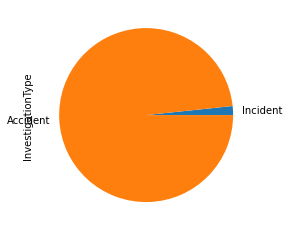

In [97]:
#showing all the Investigation Type with their number of frquency in pie Graph

df['InvestigationType'].value_counts(ascending=True).plot.pie()


In [99]:
df['AircraftCategory'].unique()

array(['Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyroplane',
       'Weight-Shift', 'Powered Parachute', 'Ultralight', 'Blimp',
       'Gyrocraft', 'missing', 'Powered-Lift', 'Unknown'], dtype=object)

In [ ]:
#showing all the aircraft category frequency
df['AircraftCategory'].value_counts().head(8)

missing         53587
Airplane        20469
Helicopter       2288
Glider            446
Balloon           116
Weight-Shift       98
Gyrocraft          88
Gyroplane          60
Name: AircraftCategory, dtype: int64

<AxesSubplot:>

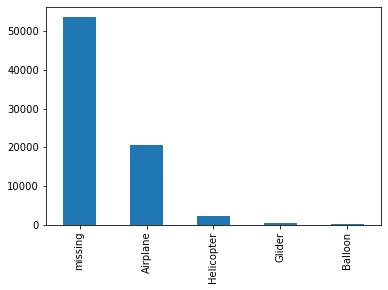

In [ ]:
#df['AircraftCategory'].value_counts().head(5).plot.bar()

<BarContainer object of 5 artists>

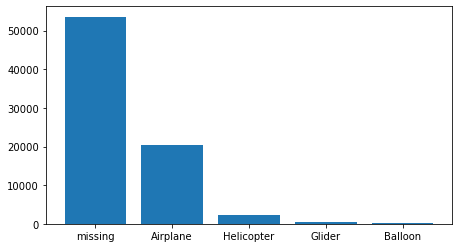

In [168]:
#showing airplane category and  investigation type with their counts
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)

plt.bar(df['AircraftCategory'].value_counts().head(5).index,df['AircraftCategory'].value_counts().head(5).values)
#plt.pie(df['InvestigationType'].value_counts().values)
#plt.pie(df['InvestigationType'].value_counts().index,df['InvestigationType'].value_counts().values)

In [ ]:
df

,EventId,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,AircraftDamage,AircraftCategory,Make,Model,PurposeofFlight,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,ReportStatus
0,20200509X11853,Accident,CEN20LA173,05-09-2020,"Haskell, OK",United States,35.864167,-95.655556,Non-Fatal,Substantial,Airplane,Titan,TITAN TORNADO S,Personal,0.0,1.0,0.0,0.0,VMC,Preliminary
1,20200507X60215,Accident,CEN20CA174,05-06-2020,"Gonazales, TX",United States,29.529167,-97.464167,Non-Fatal,Substantial,Airplane,CESSNA,T240,Personal,0.0,0.0,0.0,2.0,VMC,Preliminary
2,20200509X85739,Accident,ERA20CA175,05-03-2020,"Shirley, NY",United States,40.828056,-72.865556,Non-Fatal,Substantial,Airplane,Waco,QCF,Personal,0.0,0.0,0.0,1.0,VMC,Preliminary
3,20200502X81549,Accident,CEN20LA168,05-02-2020,"PALMYRA, IL",United States,39.408889,-89.990277,Fatal(1),Destroyed,Airplane,Yakovlev,YAK 52,Personal,1.0,0.0,0.0,0.0,VMC,Preliminary
4,20200502X73540,Accident,CEN20LA167,05-02-2020,"HOUSTON, TX",United States,29.947222,-95.395833,Fatal(1),Substantial,Helicopter,MD HELICOPTER,369,Public Aircraft - Local,1.0,1.0,0.0,0.0,VMC,Preliminary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77236,20041105X01764,Accident,CHI79FA064,08-02-1979,"Canton, OH",United States,0.000000,0.000000,Fatal(1),Destroyed,missing,Cessna,501,Personal,1.0,2.0,0.0,0.0,VMC,Probable Cause
77237,20001218X45448,Accident,LAX96LA321,19-06-1977,"EUREKA, CA",United States,0.000000,0.000000,Fatal(2),Destroyed,missing,Rockwell,112,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
77238,20061025X01555,Accident,NYC07LA005,30-08-1974,"Saltville, VA",United States,36.922223,-81.878056,Fatal(3),Destroyed,missing,Cessna,172M,Personal,3.0,0.0,0.0,0.0,IMC,Probable Cause
77239,20001218X45447,Accident,LAX94LA336,19-07-1962,"BRIDGEPORT, CA",United States,0.000000,0.000000,Fatal(4),Destroyed,missing,PIPER,PA24-180,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [140]:
df['AircraftDamage'].value_counts()

Substantial    58540
Destroyed      16817
Minor           1884
Name: AircraftDamage, dtype: int64

In [170]:
df.columns

Index(['EventId', 'InvestigationType', 'AccidentNumber', 'EventDate',
       'Location', 'Country', 'Latitude', 'Longitude', 'InjurySeverity',
       'AircraftDamage', 'AircraftCategory', 'Make', 'Model',
       'PurposeofFlight', 'TotalFatalInjuries', 'TotalSeriousInjuries',
       'TotalMinorInjuries', 'TotalUninjured', 'WeatherCondition',
       'ReportStatus', 'Year'],
      dtype='object')